# Importing required python libraries and ML algorithms 

In [1531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1532]:
df = pd.read_csv( 'laptopData (1).csv')

# An overview of the dataset

In [1533]:
df.head()

,S_No,Brand Name,Category,Screen Size,Screen Resolution,CPU,RAM,Memory,GPU,OS,Mass(in kg),Amount
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1534]:
#Number of rows and columns
df.shape

(1303, 12)

In [1535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S_No               1273 non-null   float64
 1   Brand Name         1272 non-null   object 
 2   Category           1259 non-null   object 
 3   Screen Size        1266 non-null   object 
 4   Screen Resolution  1265 non-null   object 
 5   CPU                1270 non-null   object 
 6   RAM                1273 non-null   object 
 7   Memory             1272 non-null   object 
 8   GPU                1265 non-null   object 
 9   OS                 1268 non-null   object 
 10  Mass(in kg)        1263 non-null   object 
 11  Amount             1266 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [1536]:
#Cheking for duplicate rows
df.duplicated().sum()

27

In [1537]:
#Checking for null values
df.isna().sum().sort_values(ascending=False)

Category             44
Mass(in kg)          40
Screen Resolution    38
GPU                  38
Screen Size          37
Amount               37
OS                   35
CPU                  33
Brand Name           31
Memory               31
S_No                 30
RAM                  30
dtype: int64

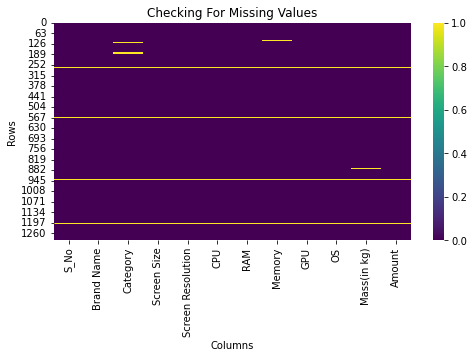

In [1538]:
# Visualizing the missing values
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Checking For Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
# Cells with missing values will be a different color compared to cells with actual data, making it easy to visualize where missing values occur in our dataset.


# Data Cleaning , Preprocessing and Feature Engineering

In [1539]:
#droping entirely empty rows to eliminate duplicacy of rows
df = df.dropna(subset=['S_No'])
df.shape


(1273, 12)

In [1540]:
df.duplicated().sum()

0

In [1541]:
df.drop(columns=['S_No'],inplace=True)
df.head()

,Brand Name,Category,Screen Size,Screen Resolution,CPU,RAM,Memory,GPU,OS,Mass(in kg),Amount
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1542]:
#Checking for absurd values(if any)
df['Brand Name'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', nan, 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [1543]:
mode_value1 = df['Brand Name'].mode()[0]

In [1544]:
df['Brand Name'].fillna(mode_value1, inplace=True)

In [1545]:
df['Category'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible', nan,
       'Workstation', 'Netbook'], dtype=object)

In [1546]:
mode_value2 = df['Category'].mode()[0]

In [1547]:
df['Category'].fillna(mode_value2, inplace=True)

In [1548]:
df['Screen Size'].unique()

array(['13.3', '15.6', '15.4', '14', '12', nan, '17.3', '13.5', '159',
       '12.5', '13', '18.4', '13.9', '1', '11.6', '2.6', '25.6', '35.6',
       '12.3', '27.3', '24', '33.5', '?', '31.6', '35', '17', '15',
       '14.1', '11.3', '40', '10.1', '5', '20000', '0'], dtype=object)

In [1549]:
#Relacing absurd values with 0 and further with a median value

replacement_dict = {
    '?': 0,
    '20000':0,
    '1':0,
    '2.6':0,
    '5':0,
    '159':0
    
}

# Replacing multiple values
df['Screen Size'].replace(replacement_dict, inplace=True)

In [1550]:
df['Screen Size']=df['Screen Size'].astype('float64')

In [1551]:
df['Screen Size'].median()

15.6

In [1552]:

df['Screen Size'] = df['Screen Size'].replace(0,15.6)
df['Screen Size'].fillna(15.6, inplace=True)

In [1553]:
mode_value3= df['Screen Resolution'].mode()[0]

In [1554]:
df['Screen Resolution'].fillna(mode_value3, inplace=True)

In [1555]:
df1=df['Screen Resolution'].str.split('x',n=1,expand=True)

In [1556]:
df['x_res']=df1[0]
df['y_res']=df1[1]

In [1557]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [1558]:
df.head()

,Brand Name,Category,Screen Size,Screen Resolution,CPU,RAM,Memory,GPU,OS,Mass(in kg),Amount,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600


In [1559]:
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [1560]:
df['Touchscreen']=df['Screen Resolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [1561]:
df['Ips']=df['Screen Resolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [1562]:
df.head()

,Brand Name,Category,Screen Size,Screen Resolution,CPU,RAM,Memory,GPU,OS,Mass(in kg),Amount,x_res,y_res,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1


In [1563]:
df['pixels_per_inches']=(((df['x_res']**2)+(df['y_res']**2))**0.5/df['Screen Size']).astype('float')

In [1564]:
df.head()

,Brand Name,Category,Screen Size,Screen Resolution,CPU,RAM,Memory,GPU,OS,Mass(in kg),Amount,x_res,y_res,Touchscreen,Ips,pixels_per_inches
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,226.983005


In [1565]:
df.drop(columns=['Screen Resolution','Screen Size','x_res','y_res'],inplace=True)

In [1566]:
df['CPU'].unique()


array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz', nan,
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GH

In [1567]:
mode_value4= df['CPU'].mode()[0]

In [1568]:
df['CPU'].fillna(mode_value4, inplace=True)

In [1569]:
df['Cpu Name']=df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [1570]:
df.head()

,Brand Name,Category,CPU,RAM,Memory,GPU,OS,Mass(in kg),Amount,Touchscreen,Ips,pixels_per_inches,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


In [1571]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [1572]:
df['Cpu Brand']=df['Cpu Name'].apply(fetch_processor)

In [1573]:
df['CPU Clock Frequency'] = df['CPU'].str.split().str[-1]

In [1574]:
df['CPU Clock Frequency']=df['CPU Clock Frequency'].str.replace('GHz','')

In [1575]:
df['CPU Clock Frequency']=df['CPU Clock Frequency'].astype('float')

In [1576]:
df.drop(columns=['CPU','Cpu Name'],inplace=True)

In [1577]:
df.head()

,Brand Name,Category,RAM,Memory,GPU,OS,Mass(in kg),Amount,Touchscreen,Ips,pixels_per_inches,Cpu Brand,CPU Clock Frequency
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,3.1


In [1578]:
df['RAM'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '0GB',
       '50486GB', '32GB', '1000GB', '24GB', '6304GB', '1GB'], dtype=object)

In [1579]:
df['RAM']=df['RAM'].str.replace('GB','')

In [1580]:
df['RAM']=df['RAM'].astype('int')

In [1581]:
replacement_dict1 = {
    
    1000:0,
    1:0,
    6304:0,
    50486:0,
    159:0
    
}

# Replace multiple values
df['RAM'].replace(replacement_dict1, inplace=True)

In [1582]:
df['RAM'].median()

8.0

In [1583]:
df['RAM'] = df['RAM'].replace(0,8.0)

In [1584]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', nan, '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [1585]:
df['Memory']=df['Memory'].str.replace('1.0','1')

C:\Users\varsh\AppData\Local\Temp\ipykernel_15148\2496852219.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory']=df['Memory'].str.replace('1.0','1')


In [1586]:
mode_value5= df['Memory'].mode()[0]


In [1587]:
df['Memory'].fillna(mode_value5, inplace=True)

In [1588]:
mode_value5= df['Memory'].mode()[0]

In [1589]:
df['Memory'] = df['Memory'].replace('?',mode_value5)

In [1590]:

# Initializing new columns
df['HDD'] = 0
df['SSD'] = 0
df['Flash Storage'] = 0
df['Hybrid'] = 0

for memory in df['Memory']:
    if ' HDD' in memory:
        size_str = memory.split(' ')[0].replace('GB', '').replace('TB', '000')
        size = int(size_str)  # Convert to GB
        df.loc[df['Memory'].str.contains(memory), 'HDD'] = size
    elif ' SSD' in memory:
        size_str = memory.split(' ')[0].replace('GB', '').replace('TB', '000')
        size = int(size_str)  # Convert to GB
        df.loc[df['Memory'].str.contains(memory), 'SSD'] = size
    elif ' Flash Storage' in memory:
        size_str = memory.split(' ')[0].replace('GB', '').replace('TB', '000')
        size = int(size_str)  # Convert to GB
        df.loc[df['Memory'].str.contains(memory), 'Flash Storage'] = size
    elif ' Hybrid' in memory:
        size_str = memory.split(' ')[0].replace('GB', '').replace('TB', '000')
        size = int(size_str)  # Convert to GB
        df.loc[df['Memory'].str.contains(memory), 'Hybrid'] = size
    elif '+' in memory:
        parts = memory.split('+')
        for part in parts:
            part = part.strip()
            if ' HDD' in part:
                size_str = part.split(' ')[0].replace('GB', '').replace('TB', '000')
                size = int(size_str)  # Convert to GB
                df.loc[df['Memory'].str.contains(memory), 'HDD'] += size
            elif ' SSD' in part:
                size_str = part.split(' ')[0].replace('GB', '').replace('TB', '000')
                size = int(size_str)  # Convert to GB
                df.loc[df['Memory'].str.contains(memory), 'SSD'] += size
            elif ' Flash Storage' in part:
                size_str = part.split(' ')[0].replace('GB', '').replace('TB', '000')
                size = int(size_str)  # Convert to GB
                df.loc[df['Memory'].str.contains(memory), 'Flash Storage'] += size
            elif ' Hybrid' in part:
                size_str = part.split(' ')[0].replace('GB', '').replace('TB', '000')
                size = int(size_str)  # Convert to GB
                df.loc[df['Memory'].str.contains(memory), 'Hybrid'] += size



In [1591]:
print(df[['Memory', 'HDD', 'SSD', 'Flash Storage', 'Hybrid']])

                   Memory   HDD  SSD  Flash Storage  Hybrid
0               128GB SSD     0  128              0       0
1     128GB Flash Storage     0    0            128       0
2               256GB SSD     0  256              0       0
3               512GB SSD     0  512              0       0
4               256GB SSD     0  256              0       0
...                   ...   ...  ...            ...     ...
1298            128GB SSD     0  128              0       0
1299            512GB SSD     0  512              0       0
1300   64GB Flash Storage     0    0             64       0
1301              1TB HDD  1000    0              0       0
1302            500GB HDD   500    0              0       0

[1273 rows x 5 columns]


In [1592]:
df.drop(columns=['Memory'],inplace=True)

In [1593]:
df.corr()['Amount']

RAM                   -0.022596
Amount                 1.000000
Touchscreen           -0.012444
Ips                   -0.018537
pixels_per_inches     -0.021051
CPU Clock Frequency   -0.036527
HDD                   -0.020960
SSD                   -0.027410
Flash Storage          0.112031
Hybrid                -0.003167
Name: Amount, dtype: float64

In [1594]:
df.drop(columns=['Hybrid'],inplace=True)

In [1595]:
df['GPU'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ', nan,
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia

In [1596]:
mode_value6= df['GPU'].mode()[0]

In [1597]:
df['GPU'].fillna(mode_value6, inplace=True)

In [1598]:
df['GPU'] = df['GPU'].replace('ARM Mali T860 MP4',mode_value6)

In [1599]:
df['GPU Brand']=df['GPU'].apply(lambda x:x.split()[0])

In [1600]:
df['GPU Brand'].value_counts()

Intel     708
Nvidia    391
AMD       174
Name: GPU Brand, dtype: int64

In [1601]:
df.drop(columns=['GPU'],inplace=True)

In [1602]:
df['OS'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', nan, 'Chrome OS', 'Windows 7', 'Android'],
      dtype=object)

In [1603]:
def ctg_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [1604]:
df['Os'] = df['OS'].apply(ctg_os)

In [1605]:
df.drop(columns=['OS'],inplace=True)

In [1606]:
df['Mass(in kg)'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [1607]:
df['Mass(in kg)']=df['Mass(in kg)'].str.replace('kg','')

In [1608]:
mode_value7= df['Mass(in kg)'].mode()[0]

In [1609]:
df['Mass(in kg)'] = df['Mass(in kg)'].replace('?',mode_value7)

In [1610]:
df['Mass(in kg)'] = df['Mass(in kg)'].replace('0.0002',mode_value7)

In [1611]:
df['Mass(in kg)'].fillna(mode_value7, inplace=True)

In [1612]:
df['Mass(in kg)']=df['Mass(in kg)'].astype('float32')

In [1613]:
df['Amount'].unique()

array([7.13786832e+04, 4.78955232e+04, 3.06360000e+04, 1.35195336e+05,
       9.60958080e+04, 2.13120000e+04, 1.14017602e+05, 6.17355360e+04,
       7.96536000e+04, 4.10256000e+04, 2.09869920e+04, 1.83810672e+04,
       1.30001602e+05, 2.65813920e+04, 0.00000000e+00, 8.09083440e+04,
       3.96936000e+04, 1.52274240e+05, 2.65867200e+04, 5.21611200e+04,
       5.32267200e+04, 1.37462400e+04, 4.36363200e+04, 3.51115200e+04,
       2.23051392e+04, 5.85547200e+04, 4.26240000e+04, 6.91574400e+04,
       4.77388800e+04, 1.30530672e+04, 1.06027200e+04, 2.33899200e+04,
       9.95803200e+04, 5.31734400e+04, 1.32667200e+04, 1.95537600e+04,
       2.60374032e+04, 4.68331200e+04, 2.07259200e+04, 7.98667200e+04,
       2.78649072e+04, 3.63369600e+04, 7.56043200e+04, 6.92107200e+04,
       3.40459200e+04, 2.48284800e+04, 4.48084800e+04, 2.12315472e+04,
       5.87678400e+04, 2.04595200e+04, 4.09083840e+04, 3.12322032e+04,
       1.30482720e+05, 2.21112000e+04, 3.19147200e+04, 5.01364800e+04,
      

In [1614]:
df['Amount'] = df['Amount'].apply(lambda x: round(x, 3))


In [1615]:
med=df['Amount'].median()
print(med)

52054.56


In [1616]:
df['Amount'].fillna(med, inplace=True)

In [1617]:
df['Amount']=df['Amount'].astype('float32')

In [1618]:
df.head()

,Brand Name,Category,RAM,Mass(in kg),Amount,Touchscreen,Ips,pixels_per_inches,Cpu Brand,CPU Clock Frequency,HDD,SSD,Flash Storage,GPU Brand,Os
0,Apple,Ultrabook,8,1.37,71378.679688,0,1,226.983005,Intel Core i5,2.3,0,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.523438,0,0,127.677940,Intel Core i5,1.8,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.000000,0,0,141.211998,Intel Core i5,2.5,0,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.343750,0,1,220.534624,Intel Core i7,2.7,0,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.804688,0,1,226.983005,Intel Core i5,3.1,0,256,0,Intel,Mac


In [1619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand Name           1273 non-null   object 
 1   Category             1273 non-null   object 
 2   RAM                  1273 non-null   int32  
 3   Mass(in kg)          1273 non-null   float32
 4   Amount               1273 non-null   float32
 5   Touchscreen          1273 non-null   int64  
 6   Ips                  1273 non-null   int64  
 7   pixels_per_inches    1273 non-null   float64
 8   Cpu Brand            1273 non-null   object 
 9   CPU Clock Frequency  1273 non-null   float64
 10  HDD                  1273 non-null   int64  
 11  SSD                  1273 non-null   int64  
 12  Flash Storage        1273 non-null   int64  
 13  GPU Brand            1273 non-null   object 
 14  Os                   1273 non-null   object 
dtypes: float32(2), float64(2), int32(1), i

In [1620]:
#Checking for any null value if it still exists after all the replacements,hopefully not!
df.isnull().sum()

Brand Name             0
Category               0
RAM                    0
Mass(in kg)            0
Amount                 0
Touchscreen            0
Ips                    0
pixels_per_inches      0
Cpu Brand              0
CPU Clock Frequency    0
HDD                    0
SSD                    0
Flash Storage          0
GPU Brand              0
Os                     0
dtype: int64

In [1621]:
df.head()

,Brand Name,Category,RAM,Mass(in kg),Amount,Touchscreen,Ips,pixels_per_inches,Cpu Brand,CPU Clock Frequency,HDD,SSD,Flash Storage,GPU Brand,Os
0,Apple,Ultrabook,8,1.37,71378.679688,0,1,226.983005,Intel Core i5,2.3,0,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.523438,0,0,127.677940,Intel Core i5,1.8,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.000000,0,0,141.211998,Intel Core i5,2.5,0,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.343750,0,1,220.534624,Intel Core i7,2.7,0,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.804688,0,1,226.983005,Intel Core i5,3.1,0,256,0,Intel,Mac


<AxesSubplot:>

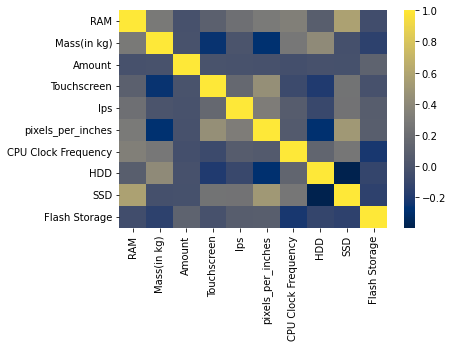

In [1622]:
#Visualizing correlation between features and the target variable(Amount)
sns.heatmap(df.corr(),cbar=True, cmap='cividis')

# Categorical Encoding

In [1623]:
lablecol = df[['Brand Name','Category','Cpu Brand', 'GPU Brand','Os']]
encoded= pd.get_dummies(lablecol,drop_first=True)
encoded.head(5)

,Brand Name_Apple,Brand Name_Asus,Brand Name_Chuwi,Brand Name_Dell,Brand Name_Fujitsu,Brand Name_Google,Brand Name_HP,Brand Name_Huawei,Brand Name_LG,Brand Name_Lenovo,...,Category_Ultrabook,Category_Workstation,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,GPU Brand_Intel,GPU Brand_Nvidia,Os_Others/No OS/Linux,Os_Windows
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [1624]:
#Concatenating the encoded dataframe with the original dataframe,dropping the no more required columns meanwhile
df = pd.concat([df, encoded], axis=1)
columns_to_drop=['Brand Name','Category','Cpu Brand', 'GPU Brand','Os']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,RAM,Mass(in kg),Amount,Touchscreen,Ips,pixels_per_inches,CPU Clock Frequency,HDD,SSD,Flash Storage,...,Category_Ultrabook,Category_Workstation,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,GPU Brand_Intel,GPU Brand_Nvidia,Os_Others/No OS/Linux,Os_Windows
0,8,1.37,71378.679688,0,1,226.983005,2.3,0,128,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,47895.523438,0,0,127.677940,1.8,0,0,128,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,30636.000000,0,0,141.211998,2.5,0,256,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,135195.343750,0,1,220.534624,2.7,0,512,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,96095.804688,0,1,226.983005,3.1,0,256,0,...,1,0,0,1,0,0,1,0,0,0


# Data Splitting for training and testing

In [1625]:
X=df.drop(columns=['Amount'])
y=df['Amount']


In [1626]:
X.head()

,RAM,Mass(in kg),Touchscreen,Ips,pixels_per_inches,CPU Clock Frequency,HDD,SSD,Flash Storage,Brand Name_Apple,...,Category_Ultrabook,Category_Workstation,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,GPU Brand_Intel,GPU Brand_Nvidia,Os_Others/No OS/Linux,Os_Windows
0,8,1.37,0,1,226.983005,2.3,0,128,0,1,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,0,0,127.677940,1.8,0,0,128,1,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,0,0,141.211998,2.5,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,0,1,220.534624,2.7,0,512,0,1,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,0,1,226.983005,3.1,0,256,0,1,...,1,0,0,1,0,0,1,0,0,0


In [1627]:
y.head()

0     71378.679688
1     47895.523438
2     30636.000000
3    135195.343750
4     96095.804688
Name: Amount, dtype: float32

In [1628]:
#I have used 4:1 as the splitting ratio for training data(=80%) and testing data(=20%) respectively. Since the dataset is not quite large ,thus I choose this ratio as appropriate.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# ML Model Implementation

In [1629]:
#I am choosing Support Vector Regression(SVR) as it works well on small to medium-sized dataset
model = SVR(kernel='linear')

# Training the SVR model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
svr_y_pred = model.predict(X_test)

# Evaluating model's performance

In [1630]:
#Implementing all five evaluation metrics 
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_adjusted_r2 = 1-(1-r2_score((y_test), (svr_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print("Mean Absolute Error:",svr_mae)
print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("R-squared (R2) Score:", svr_r2)
print("Adjusted R2 Score:",svr_adjusted_r2)

Mean Absolute Error: 16549.262911955815
Mean Squared Error: 561289928.1346606
Root Mean Squared Error: 23691.55816181495
R-squared (R2) Score: 0.5676747615555775
Adjusted R2 Score: 0.4868663057715733


In [1631]:
SVR_Dataframe = pd.DataFrame(zip(y_test, svr_y_pred), columns = ['actual', 'predicted'])
SVR_Dataframe

,actual,predicted
0,23757.552734,35625.834372
1,40705.921875,31587.454055
2,89864.179688,153926.871376
3,21791.519531,17286.023543
4,172627.203125,112502.634825
...,...,...
250,63669.601562,39975.402803
251,63669.601562,57643.974717
252,15238.080078,18405.984024
253,117162.718750,77962.018060


# The model is performing with 57% accuracy , To be continued for improved accuracy!!